In [149]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


In [150]:
df=pd.read_csv('C://Users//owner//IRIS.csv')


In [151]:
df=df.drop(['species'],axis=1)
#df=pd.get_dummies(df)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [152]:
import numpy as np

# Function to standardize data
def standardize_data(data):
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)
    standardized = (data - mean) / std_dev
    return standardized, mean, std_dev

# Function to calculate covariance matrix
def calculate_covariance_matrix(data):
    num_samples = data.shape[0]
    covariance_matrix = np.dot(data.T, data) / (num_samples - 1)
    return covariance_matrix

# Power Iteration method to find the dominant eigenvalue and eigenvector
def power_iteration(matrix, num_iterations):
    # Initialize a random vector of the same size as the matrix
    vector = np.random.rand(matrix.shape[1])

    for _ in range(num_iterations):
        # Multiply the matrix with the vector
        vector = np.dot(matrix, vector)
        
        # Normalize the vector
        vector /= np.linalg.norm(vector)
    
    # Calculate the eigenvalue
    eigenvalue = np.dot(np.dot(matrix, vector), vector) / np.dot(vector, vector)
    
    return eigenvalue, vector

# Function to perform PCA
def apply_pca(data, num_components):
    standardized_data, mean, std_dev = standardize_data(data)
    covariance_matrix = calculate_covariance_matrix(standardized_data)
    
    eigenvalues = []
    eigenvectors = []

    for _ in range(num_components):
        eigenvalue, eigenvector = power_iteration(covariance_matrix, num_iterations=1000)
        eigenvalues.append(eigenvalue)
        eigenvectors.append(eigenvector)
        
        # Deflate the covariance matrix to find the next largest eigenvalue
        covariance_matrix -= eigenvalue * np.outer(eigenvector, eigenvector)
    
    eigenvalues = np.array(eigenvalues)
    eigenvectors = np.array(eigenvectors).T

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto the new subspace
    transformed_data = np.dot(standardized_data, principal_components)

    # Reconstruct the data (optional)
    reconstructed_data = np.dot(transformed_data, principal_components.T) * std_dev + mean

    return transformed_data, reconstructed_data, eigenvalues, eigenvectors


In [173]:
data_array = df.values
print(data_array)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [187]:
# Applying PCA
num_components = 2 # Number of principal components
transformed, reconstructed, eigenvalues, eigenvectors = apply_pca(data_array, num_components)

print(reconstructed.shape)
# View the first few rows of the transformed data after PCA
print("\nTransformed data after PCA - First few rows:")
print(pd.DataFrame(reconstructed).head())

# View the last few rows of the transformed data after PCA
print("\nTransformed data after PCA - Last few rows:")
print(pd.DataFrame(reconstructed).tail())

(150, 4)

Transformed data after PCA - First few rows:
          0         1         2         3
0  5.022448  3.513992  1.462720  0.249598
1  4.742457  3.029306  1.601710  0.268453
2  4.724617  3.196108  1.326447  0.164102
3  4.673166  3.086103  1.382083  0.178748
4  5.020837  3.595753  1.342004  0.204562

Transformed data after PCA - Last few rows:
            0         1         2         3
145  6.767373  2.994239  5.684826  2.022433
146  6.237041  2.514527  5.318099  1.824102
147  6.580970  2.987627  5.323099  1.866225
148  6.749017  3.303876  5.203251  1.841375
149  6.250053  2.935911  4.738389  1.610259


In [188]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.5, min_samples=4, metric='euclidean')


In [189]:
model=db.fit(reconstructed)
label=model.labels_


In [197]:
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 4


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


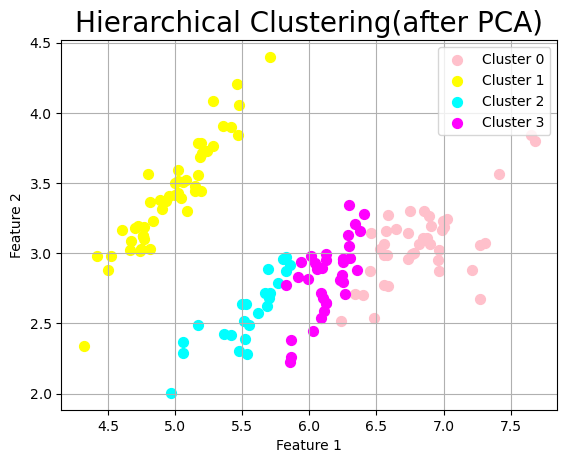

In [198]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

hc = AgglomerativeClustering(n_clusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(reconstructed)
colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange', 'blue', 'red', 'black', 'violet',
          'green', 'brown', 'gray', 'olive', 'purple', 'teal', 'gold', 'navy', 'salmon',
          'lime', 'skyblue', 'indigo', 'coral'] 

for i in range(n_clusters):
    plt.scatter(reconstructed[y_hc == i, 0], reconstructed[y_hc == i, 1], s=50, c=colors[i], label=f'Cluster {i}')

plt.title('Hierarchical Clustering(after PCA)', fontsize=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


In [199]:
model2=db.fit(data_array)
label2=model2.labels_
from sklearn import metrics

#identifying the points which makes up our core points
sample_cores=np.zeros_like(label2,dtype=bool)

sample_cores[db.core_sample_indices_]=True

#Calculating the number of clusters

n_clusters2=len(set(label2))- (1 if -1 in label2 else 0)
print('No of clusters:',n_clusters2)

No of clusters: 3


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


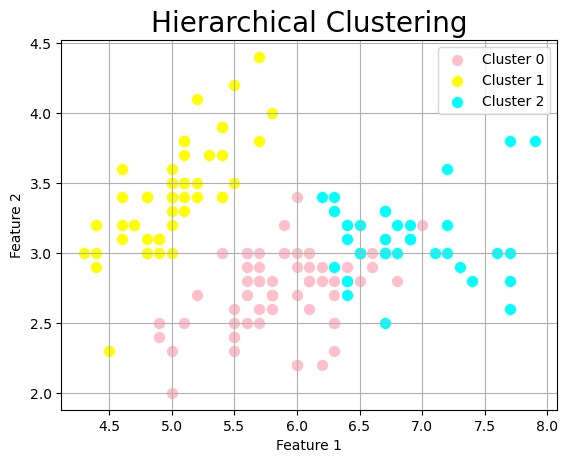

In [200]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

hc = AgglomerativeClustering(n_clusters2, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data_array)

colors = ['pink', 'yellow', 'cyan', 'magenta', 'orange', 'blue', 'red', 'black', 'violet',
          'green', 'brown', 'gray', 'olive', 'purple', 'teal', 'gold', 'navy', 'salmon',
          'lime', 'skyblue', 'indigo', 'coral'] 

for i in range(n_clusters2):
    plt.scatter(data_array[y_hc == i, 0], data_array[y_hc == i, 1], s=50, c=colors[i], label=f'Cluster {i}')

plt.title('Hierarchical Clustering', fontsize=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()